In [ ]:
# Define the path to the dataset
file_path = 'Dataset4_EWS.xlsx'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import multivariate_normal
from sklearn.metrics import precision_score, recall_score, f1_score
from pathlib import Path
file_path = Path('Data/Dataset4_EWS.xlsx')

Data columns: ['Data', 'BDIY', 'CRY', 'Cl1', 'DXY', 'ECSURPUS', 'EMUSTRUU', 'EONIA', 'GBP', 'GT10', 'GTDEM10Y', 'GTDEM2Y', 'GTDEM30Y', 'GTGBP20Y', 'GTGBP2Y', 'GTGBP30Y', 'GTITL10YR', 'GTITL2YR', 'GTITL30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTJPY30YR', 'JPY', 'LF94TRUU', 'LF98TRUU', 'LG30TRUU', 'LMBITR', 'LP01TREU', 'LUACTRUU', 'LUMSTRUU', 'MXBR', 'MXCN', 'MXEU', 'MXIN', 'MXJP', 'MXRU', 'MXUS', 'US0001M', 'USGG2YR', 'USGG30YR', 'USGG3M', 'VIX', 'XAUBGNL', 'Y']
Data shape: (1111, 42)
Total number of records: 1111
Time period: from 01/11/2000 to 04/20/2021
Frequency: W-TUE
Number of variables: 42
Number of anomalies: 237 (21.33%)

Metadata and statistics:


,Ticker,Description,Mean,Std.Dev,Min,Max,Missing values,Missing (%)
0,BDIY,Baltic Dry Index,2259.860486,2017.811888,291.00000,11793.00000,0,0.00%
1,CRY,TR/CC CRB ER Index,245.247649,68.278081,106.29290,467.57000,0,0.00%
2,Cl1,Generic 1st 'CL' Future,60.708101,25.900813,10.01000,140.97000,0,0.00%
3,DXY,DOLLAR INDEX SPOT,90.934982,11.379095,71.32900,119.82000,0,0.00%
4,ECSURPUS,Bloomberg ECO US Surprise Inde,0.036153,0.349453,-0.97400,0.99100,0,0.00%
5,EMUSTRUU,EM USD Aggregate,704.379495,309.951768,230.52670,1286.35300,0,0.00%
6,EONIA,EMMI EURO OverNight Index Aver,1.363676,1.721894,-0.49800,5.73000,0,0.00%
7,GBP,British Pound Spot,1.569618,0.212340,1.17230,2.08520,0,0.00%
8,GT10,US TREASURY N/B,3.266748,1.332464,0.50800,6.74800,0,0.00%
9,GTDEM10Y,BUNDESREPUB. DEUTSCHLAND,2.448365,1.851558,-0.79400,5.64400,0,0.00%


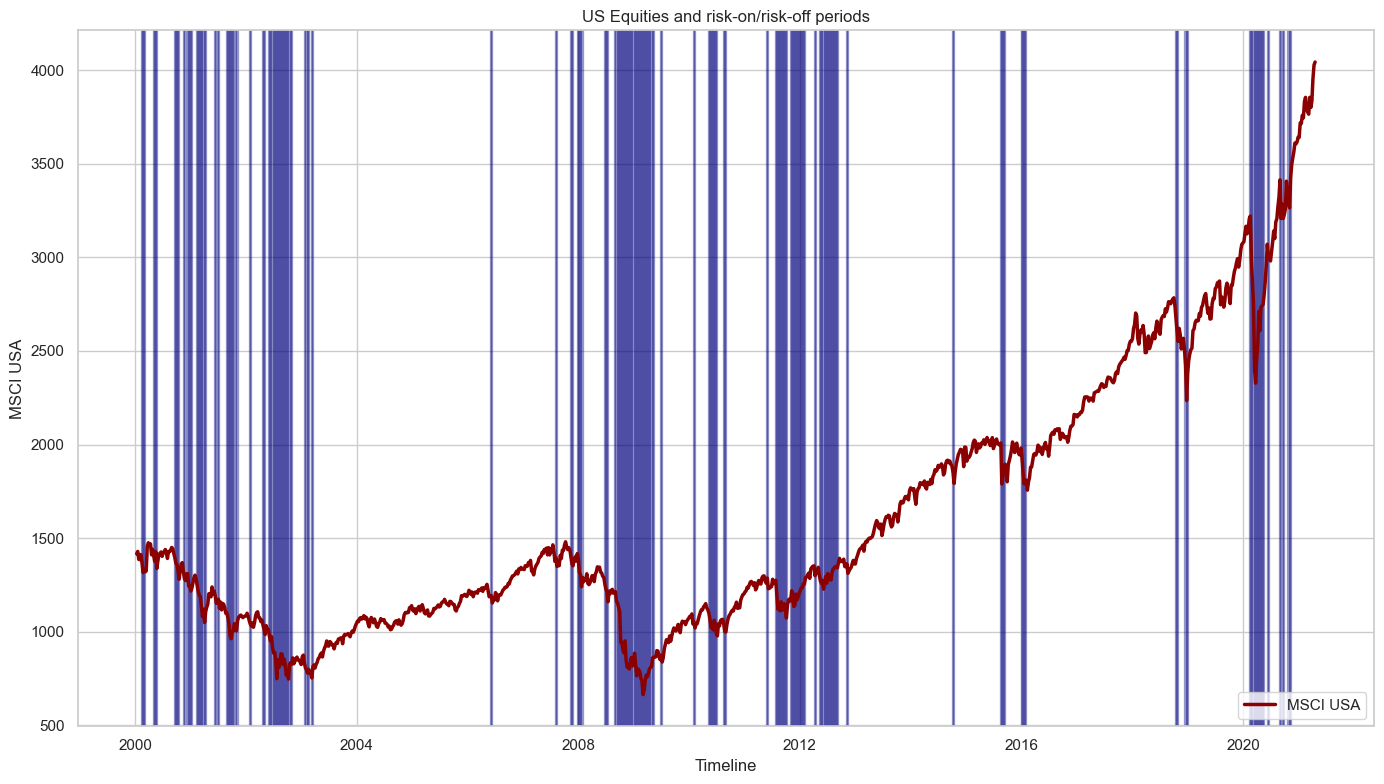

In [51]:
# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

# Load the data from the Excel file
# First sheet contains market data with dates and anomaly labels, second sheet contains metadata
data_df = pd.read_excel(file_path, sheet_name='Markets')
metadata_df = pd.read_excel(file_path, sheet_name='Metadata')

# Check the structure of the loaded data
print("Data columns:", data_df.columns.tolist())

# Extract date and anomaly label columns
date_col = 'Date' if 'Date' in data_df.columns else data_df.columns[0]
y_col = 'Y' if 'Y' in data_df.columns else None

# Convert dates to datetime format
data_df[date_col] = pd.to_datetime(data_df[date_col], dayfirst=True)  # Date format is dd/mm/yy

# Set date as index
data_df = data_df.set_index(date_col)

# Extract features (all columns except Y if it exists)
if y_col:
    X_df = data_df.drop(y_col, axis=1)
    y = data_df[y_col].values
else:
    X_df = data_df
    y = None

# Display basic information about the dataset
print(f"Data shape: {X_df.shape}")
print(f"Total number of records: {len(X_df)}")
print(f"Time period: from {X_df.index.min().strftime('%m/%d/%Y')} to {X_df.index.max().strftime('%m/%d/%Y')}")
print(f"Frequency: {pd.infer_freq(X_df.index) or 'Weekly'}")
print(f"Number of variables: {X_df.shape[1]}")
if y_col:
    print(f"Number of anomalies: {np.sum(y == 1)} ({np.mean(y == 1)*100:.2f}%)")

# Create a more comprehensive metadata table with additional statistics
enhanced_metadata = []

# Determine the correct column names for ticker and description
ticker_col = 'ticker' if 'ticker' in metadata_df.columns else metadata_df.columns[0]
desc_col = 'description' if 'description' in metadata_df.columns else metadata_df.columns[1] if len(metadata_df.columns) > 1 else ticker_col

for ticker in X_df.columns:
    # Get metadata for this ticker if available
    meta_row = metadata_df[metadata_df[ticker_col] == ticker] if ticker in metadata_df[ticker_col].values else pd.DataFrame()

    # Get description or use ticker if not found
    description = meta_row[desc_col].values[0] if not meta_row.empty and desc_col in meta_row.columns else ticker

    # Calculate statistics for this series
    series = X_df[ticker]

    enhanced_metadata.append({
        'Ticker': ticker,
        'Description': description,
        'Mean': series.mean(),
        'Std.Dev': series.std(),
        'Min': series.min(),
        'Max': series.max(),
        'Missing values': series.isna().sum(),
        'Missing (%)': f"{series.isna().mean()*100:.2f}%"
    })

# Create enhanced metadata dataframe
enhanced_meta_df = pd.DataFrame(enhanced_metadata)

# Display the enhanced metadata
print("\nMetadata and statistics:")
display(enhanced_meta_df)

# Create a plot with anomalies as vertical bars and MXUS as a line
if y_col and 'MXUS' in X_df.columns:
    fig, ax = plt.subplots(figsize=(14, 8))

    # Plot MXUS line
    ax.plot(X_df.index, X_df['MXUS'], color='darkred', linewidth=2.5, label='MSCI USA')

    # Get the y-axis limits after plotting MXUS
    y_min, y_max = ax.get_ylim()

    # For each anomaly point (Y=1), create a vertical span across the entire plot
    for i, (date, is_anomaly) in enumerate(zip(X_df.index, y)):
        if is_anomaly == 1:
            ax.axvspan(date, date + pd.Timedelta(days=7), alpha=0.3, color='navy', label='Risk-on/Risk-off' if i == 0 else "")

    # Set labels and title
    ax.set_xlabel('Timeline')
    ax.set_ylabel('MSCI USA')
    ax.set_title('US Equities and risk-on/risk-off periods')

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='best')

    plt.tight_layout()
    plt.show()
else:
    print("Either 'Y' column or 'MXUS' column is missing in the dataset.")


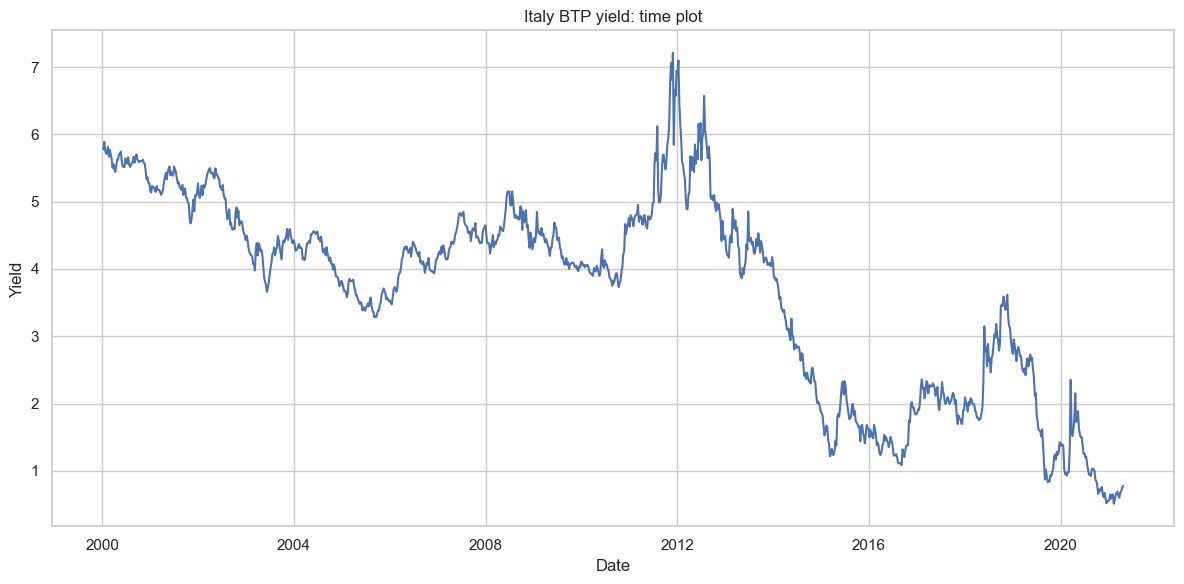

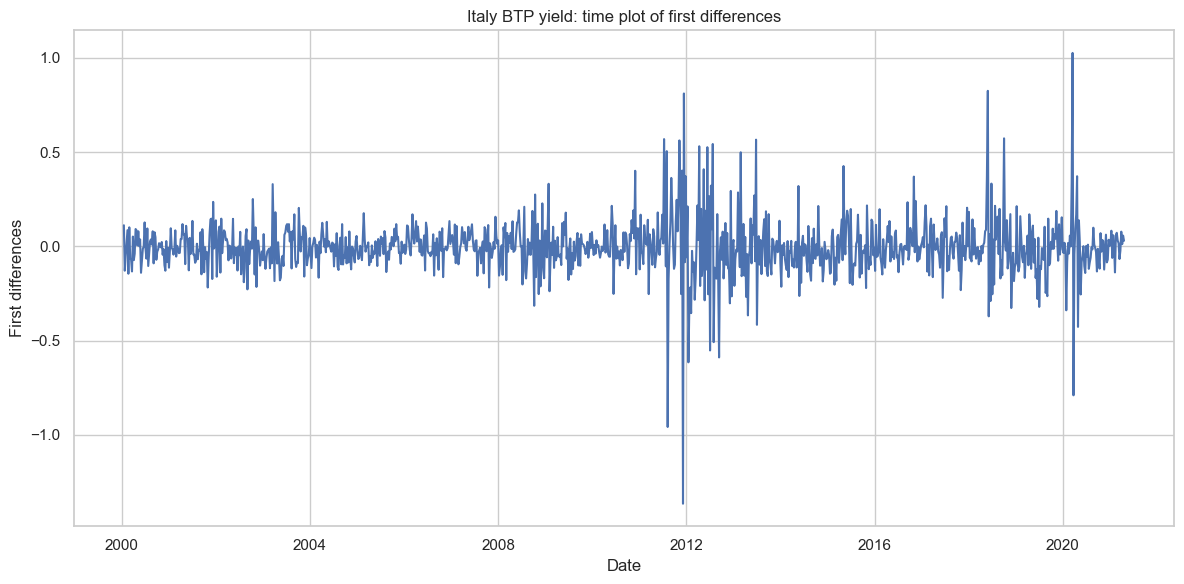

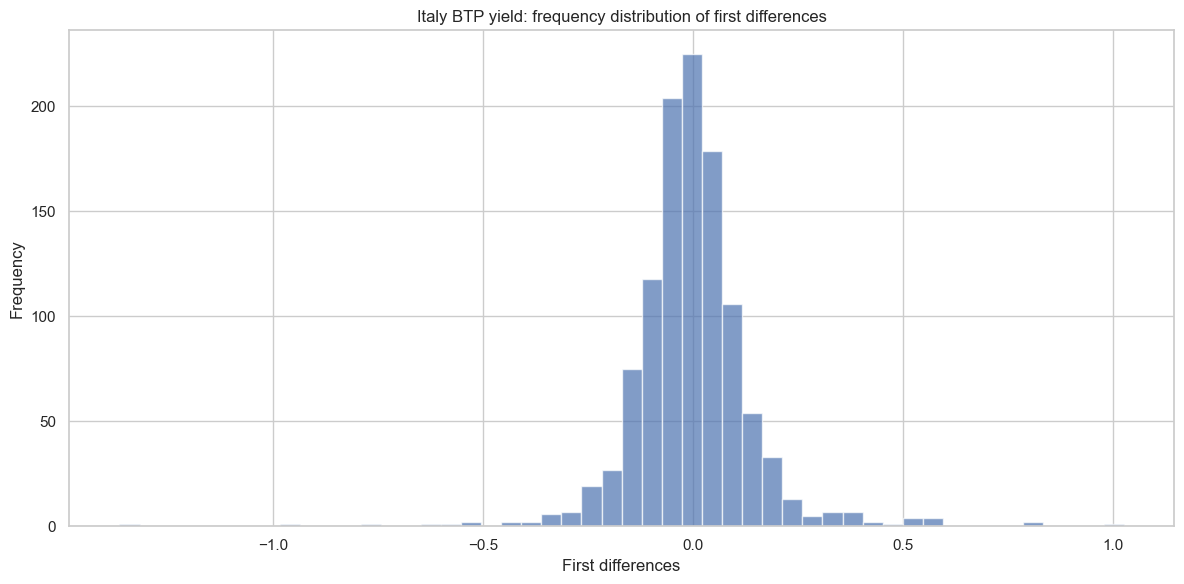

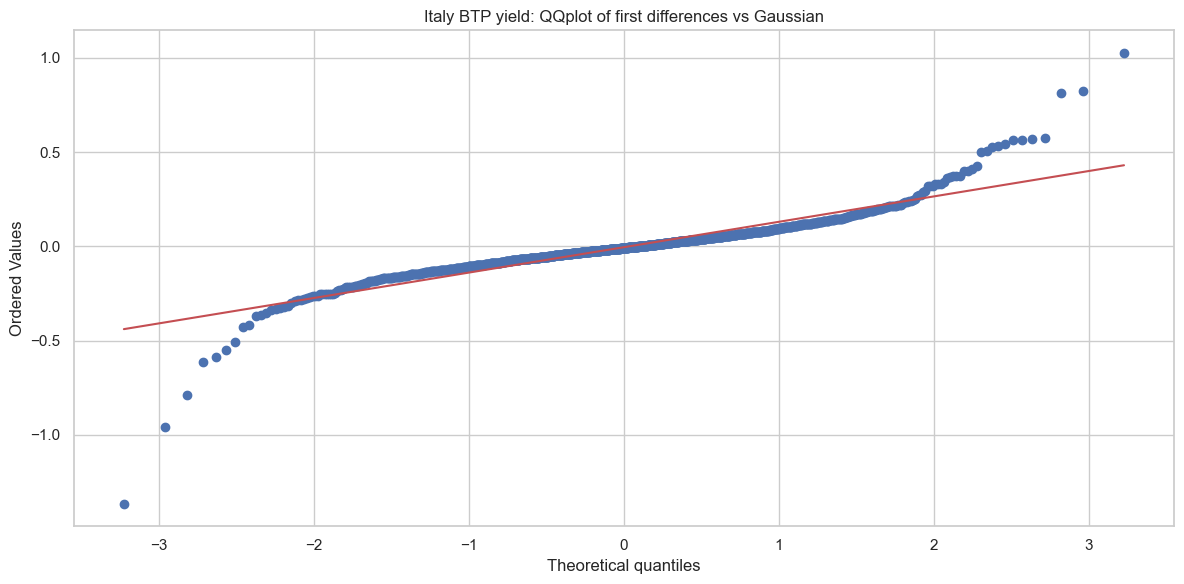

In [52]:
from scipy import stats
import statsmodels.api as sm

# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]

# Analyze a bond yield (interest rate) - Italian BTP 10Yrs
if 'GTITL10YR' in X_df.columns:
    # Time plot of levels
    plt.figure(figsize=(12, 6))
    plt.plot(X_df.index, X_df['GTITL10YR'])
    plt.title('Italy BTP yield: time plot')
    plt.xlabel('Date')
    plt.ylabel('Yield')
    plt.tight_layout()
    plt.show()

    # Time plot of first differences
    plt.figure(figsize=(12, 6))
    plt.plot(X_df.index[1:], np.diff(X_df['GTITL10YR']))
    plt.title('Italy BTP yield: time plot of first differences')
    plt.xlabel('Date')
    plt.ylabel('First differences')
    plt.tight_layout()
    plt.show()

    # Histogram of first differences
    plt.figure(figsize=(12, 6))
    plt.hist(np.diff(X_df['GTITL10YR']), bins=50, alpha=0.7)
    plt.title('Italy BTP yield: frequency distribution of first differences')
    plt.xlabel('First differences')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # QQ plot of first differences vs Gaussian
    plt.figure(figsize=(12, 6))
    stats.probplot(np.diff(X_df['GTITL10YR']), dist="norm", plot=plt)
    plt.title('Italy BTP yield: QQplot of first differences vs Gaussian')
    plt.tight_layout()
    plt.show()


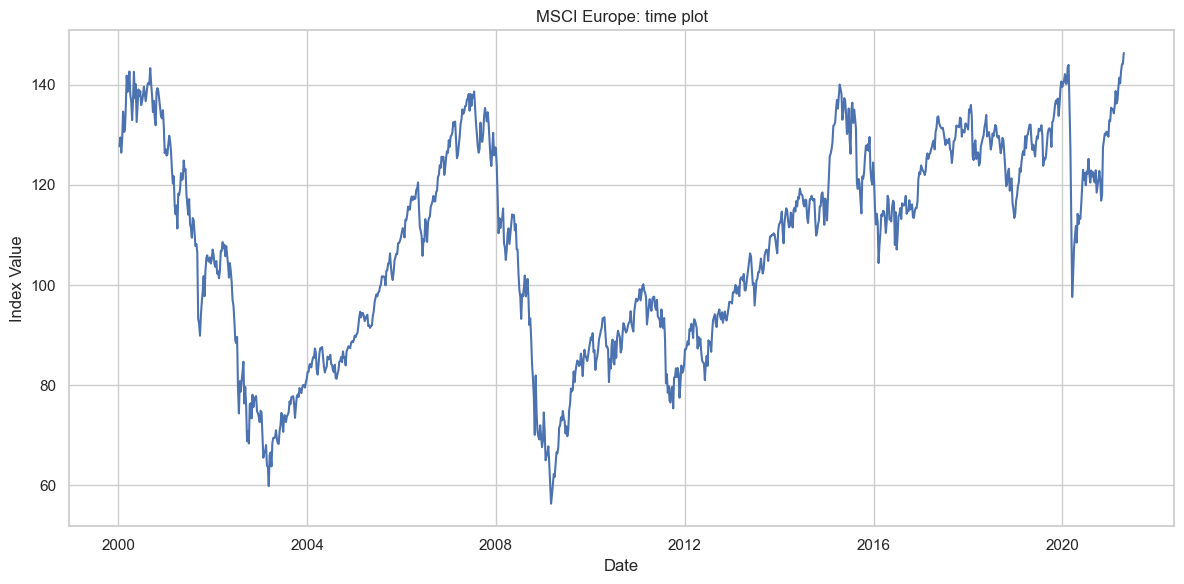

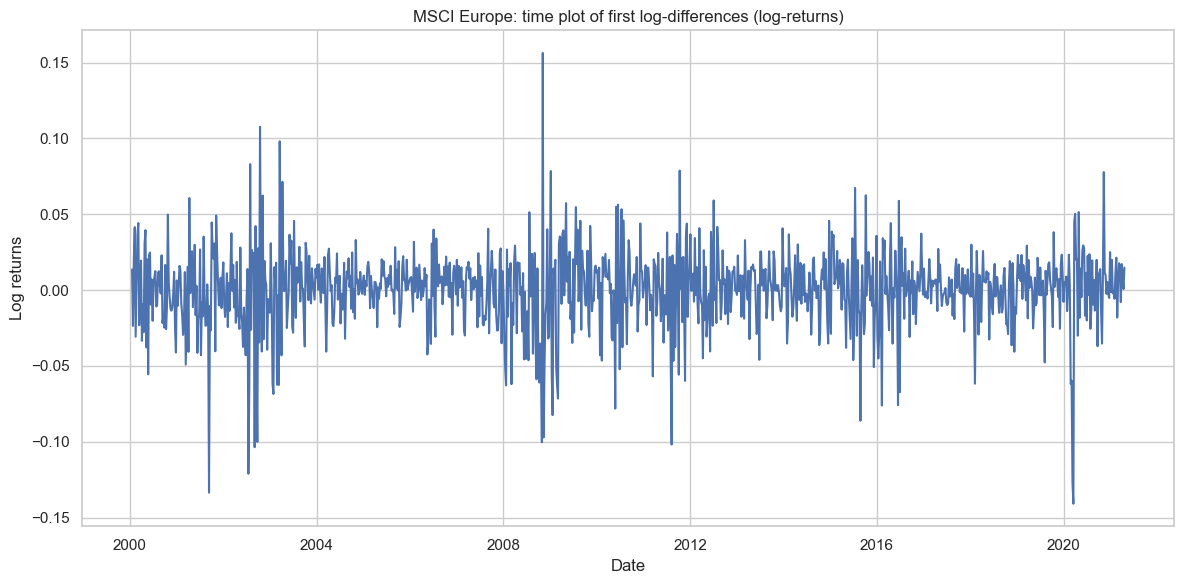

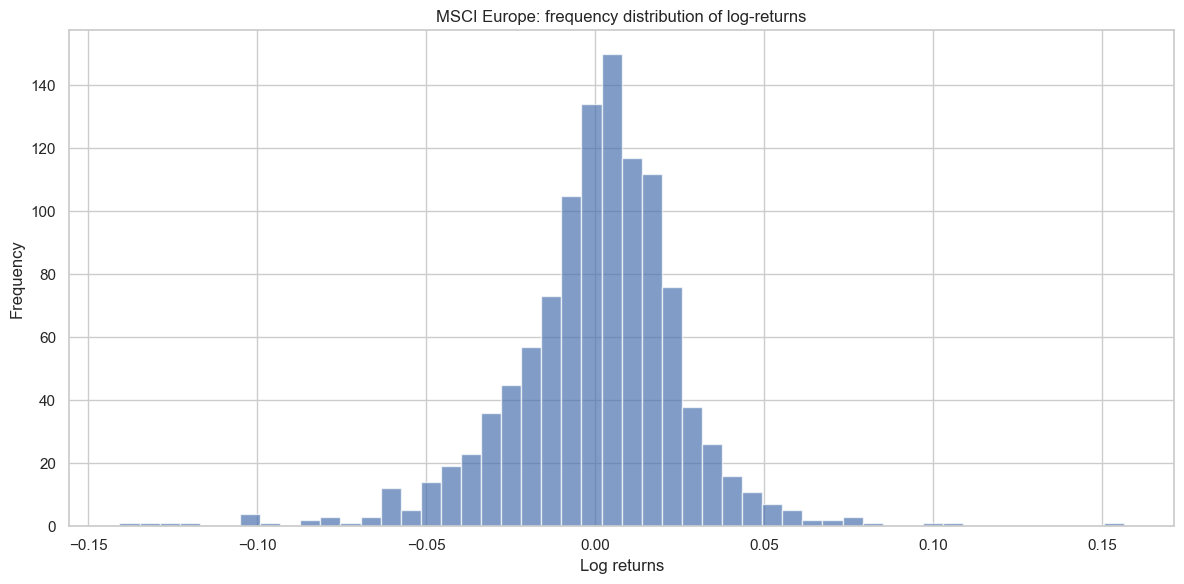

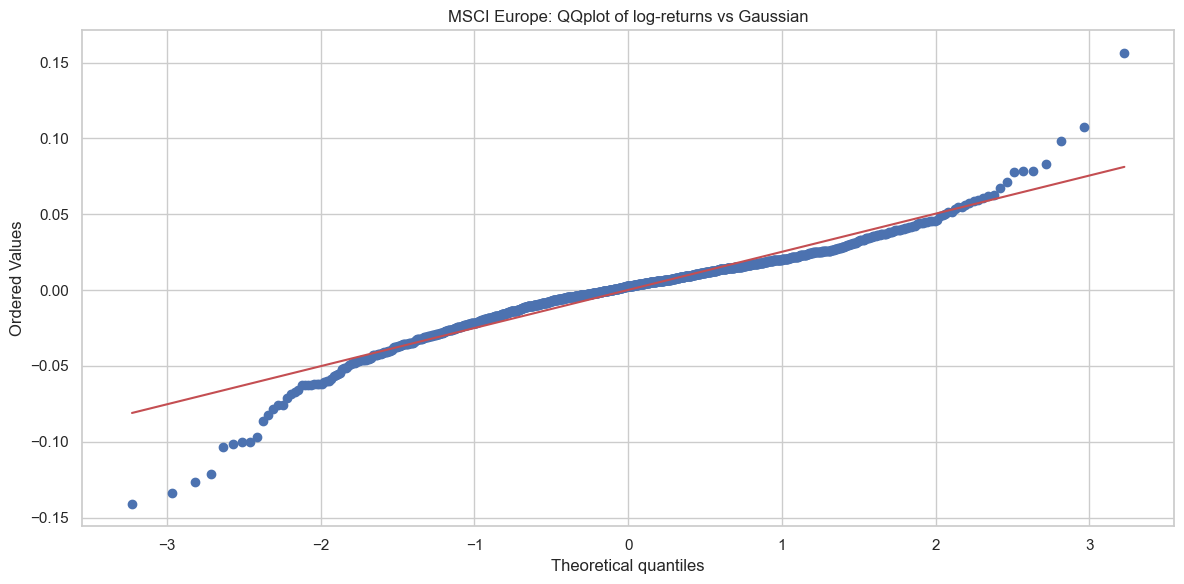

In [53]:
# Now we do it on a relative equity index
# Analyze an equity asset - MSCI Europe
if 'MXEU' in X_df.columns:
    # Time plot of levels
    plt.figure(figsize=(12, 6))
    plt.plot(X_df.index, X_df['MXEU'])
    plt.title('MSCI Europe: time plot')
    plt.xlabel('Date')
    plt.ylabel('Index Value')
    plt.tight_layout()
    plt.show()

    # Time plot of log returns
    plt.figure(figsize=(12, 6))
    log_returns = np.diff(np.log(X_df['MXEU']))
    plt.plot(X_df.index[1:], log_returns)
    plt.title('MSCI Europe: time plot of first log-differences (log-returns)')
    plt.xlabel('Date')
    plt.ylabel('Log returns')
    plt.tight_layout()
    plt.show()

    # Histogram of log returns
    plt.figure(figsize=(12, 6))
    plt.hist(log_returns, bins=50, alpha=0.7)
    plt.title('MSCI Europe: frequency distribution of log-returns')
    plt.xlabel('Log returns')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # QQ plot of log returns vs Gaussian
    plt.figure(figsize=(12, 6))
    stats.probplot(log_returns, dist="norm", plot=plt)
    plt.title('MSCI Europe: QQplot of log-returns vs Gaussian')
    plt.tight_layout()
    plt.show()


In [54]:
# Make data stationary based on variable type
# So w define lists of variables by type
indices_currencies = [col for col in X_df.columns if col in [
    'XAUBGNL', 'BDIY', 'CRY', 'Cl1', 'DXY', 'EMUSTRUU', 'GBP', 'JPY', 'LF94TRUU',
    'LF98TRUU', 'LG30TRUU', 'LMBITR', 'LP01TREU', 'LUACTRUU', 'LUMSTRUU',
    'MXBR', 'MXCN', 'MXEU', 'MXIN', 'MXJP', 'MXRU', 'MXUS', 'VIX'
]]

interest_rates = [col for col in X_df.columns if col in [
    'EONIA', 'GTDEM10Y', 'GTDEM2Y', 'GTDEM30Y', 'GTGBP20Y', 'GTGBP2Y', 'GTGBP30Y',
    'GTITL10YR', 'GTITL2YR', 'GTITL30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTJPY30YR',
    'US0001M', 'USGG3M', 'USGG2YR', 'GT10', 'USGG30YR'
]]

# Create a new dataframe for stationary data
stationary_df = pd.DataFrame(index=X_df.index[1:])

# Apply log-differences to indices and currencies (always positive)
for col in indices_currencies:
    if col in X_df.columns:
        stationary_df[col] = np.diff(np.log(X_df[col]))

# Apply first differences to interest rates (can be negative or very close to 0)
for col in interest_rates:
    if col in X_df.columns:
        stationary_df[col] = np.diff(X_df[col])

# Keep Bloomberg Economic US Surprise Index as is (already stationary)
if 'ECSURPUS' in X_df.columns:
    stationary_df['ECSURPUS'] = X_df['ECSURPUS'].values[1:]

# Adjust the response variable to match the new data length
if y is not None:
    y_stationary = y[1:]
else:
    y_stationary = None


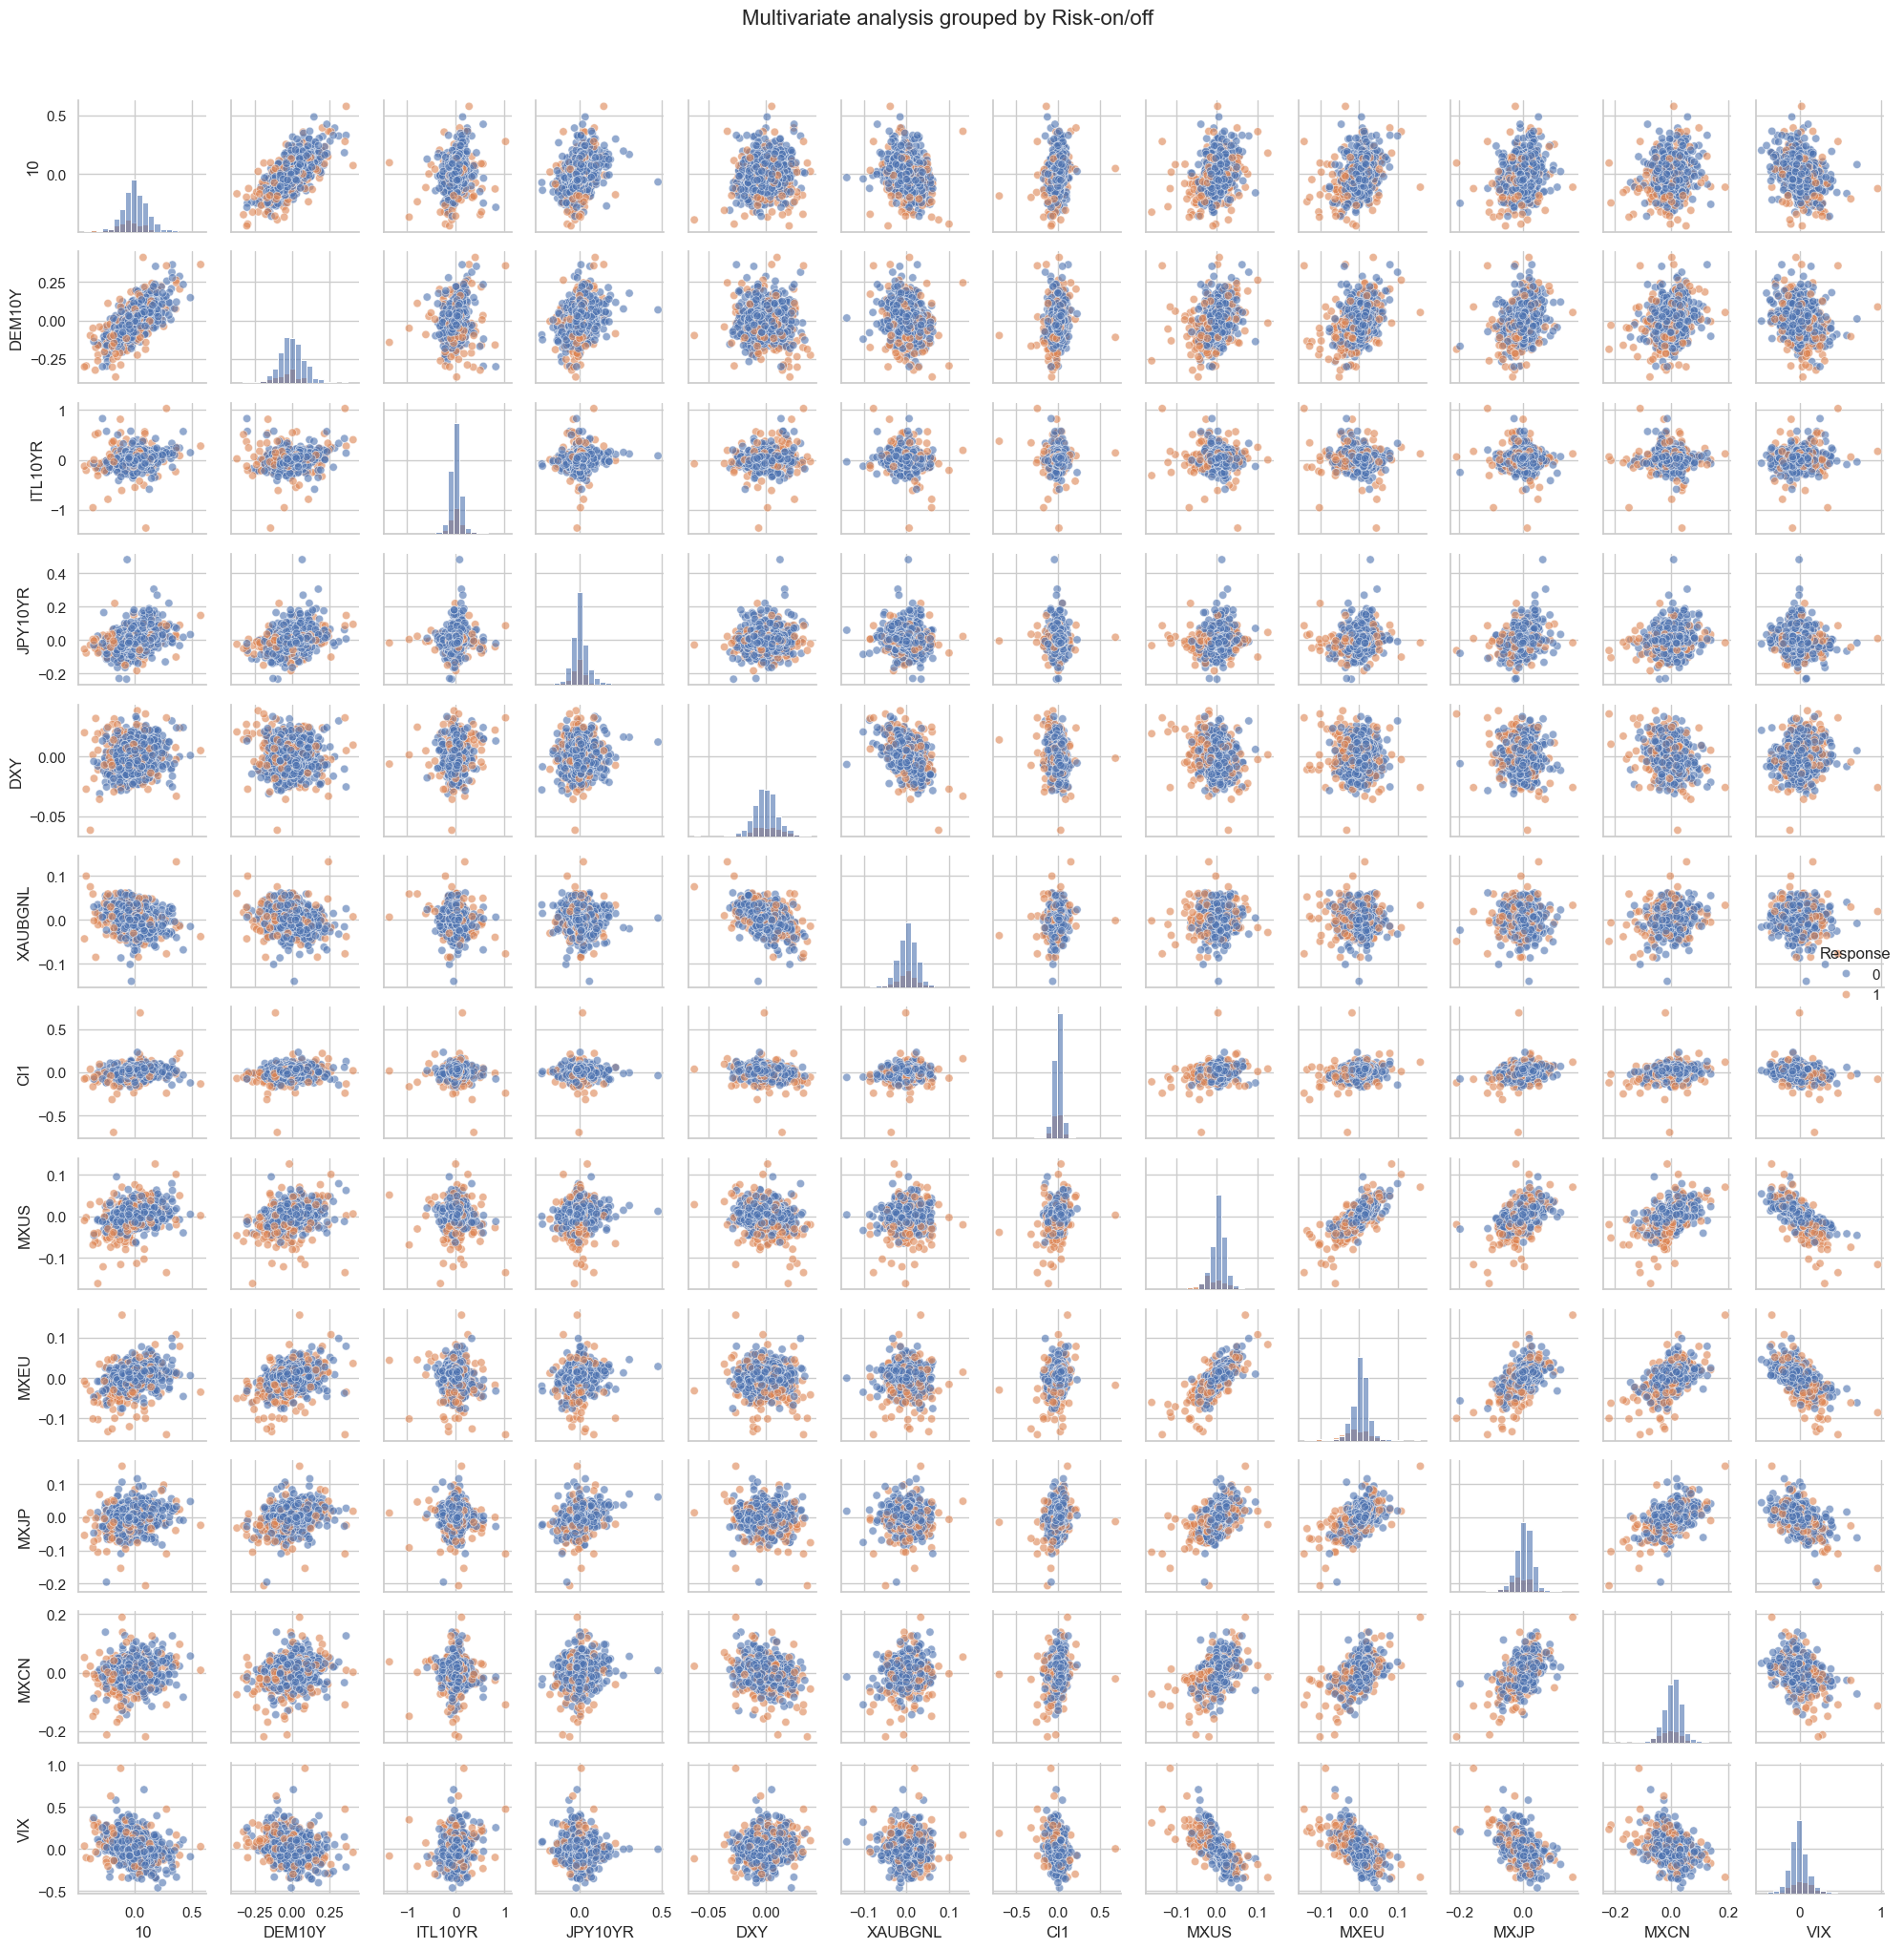

In [55]:
## Multivariate perspective

# Matrix of scatter plots comparing our Xs by using the our Y as grouping variable (I plot just a selection of features, and they are already too many).
# I guess you can spot visual differences in the behavior of variables during normal and abnormal periods.


# Create a matrix of scatter plots with Y as grouping variable
# Select a subset of variables for visualization (otherwise the chart is too big)
plot_vars = []
plot_names = []

# Add interest rates (first differences)
for col in ['GT10', 'GTDEM10Y', 'GTITL10YR', 'GTJPY10YR']:
    if col in stationary_df.columns:
        plot_vars.append(stationary_df[col])
        plot_names.append(col.replace('GT', ''))

# Add indices and currencies (log differences)
for col in ['DXY', 'XAUBGNL', 'Cl1', 'MXUS', 'MXEU', 'MXJP', 'MXCN', 'VIX']:
    if col in stationary_df.columns:
        plot_vars.append(stationary_df[col])
        plot_names.append(col)

# Convert to numpy array for plotting
plot_data = np.column_stack(plot_vars)

# Create a custom pairplot with grouping by Y
if y_stationary is not None and len(plot_vars) > 0:
    # Create a DataFrame with the selected variables and the response
    plot_df = pd.DataFrame(plot_data, columns=plot_names)
    plot_df['Response'] = y_stationary

    # Create a pairplot with different colors for Y=0 and Y=1
    g = sns.pairplot(plot_df, hue='Response', diag_kind='hist',
                     plot_kws={'alpha': 0.6}, diag_kws={'alpha': 0.6, 'bins': 20})

    # Customize the plot
    g.fig.suptitle('Multivariate analysis grouped by Risk-on/off', y=1.02, fontsize=16)
    g.fig.set_size_inches(20, 20)
    plt.tight_layout()
    plt.show()


In [56]:
# Step 1: shuffle and split data into training, validation, and test sets
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]

# Convert to numpy arrays for easier manipulation
X = stationary_df.values
y = y_stationary

# Step 1: Creating training/cross-validation/test set with reshuffling

# Reshuffle the data (this will break down autocorrelation)
X_shuffled, y_shuffled = shuffle(X, y, random_state=42) # mantiene legame X, y

# Separate normal and anomalous examples
X_normal = X_shuffled[y_shuffled == 0]
X_anomaly = X_shuffled[y_shuffled == 1]

# Calculate sizes for each set
n_normal = X_normal.shape[0]
n_anomaly = X_anomaly.shape[0]

# Training set: 80% of normal examples
train_size = int(0.8 * n_normal)
X_train = X_normal[:train_size]

# Cross-validation set: 10% of normal examples and 50% of anomalies
cv_normal_size = int(0.1 * n_normal)
cv_anomaly_size = int(0.5 * n_anomaly)
X_cv_normal = X_normal[train_size:train_size + cv_normal_size]
X_cv_anomaly = X_anomaly[:cv_anomaly_size]
X_cross_val = np.vstack((X_cv_normal, X_cv_anomaly))
y_cross_val = np.hstack((np.zeros(cv_normal_size), np.ones(cv_anomaly_size)))

# Test set: 10% of normal examples and 50% of anomalies
X_test_normal = X_normal[train_size + cv_normal_size:]
X_test_anomaly = X_anomaly[cv_anomaly_size:]
X_test = np.vstack((X_test_normal, X_test_anomaly))
y_test = np.hstack((np.zeros(len(X_test_normal)), np.ones(len(X_test_anomaly))))

# We'll standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_cross_val = scaler.transform(X_cross_val)
X_test = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]} (all normal)")
print(f"Cross-validation set size: {X_cross_val.shape[0]} ({cv_normal_size} normal, {cv_anomaly_size} anomalies)")
print(f"Test set size: {X_test.shape[0]} ({len(X_test_normal)} normal, {len(X_test_anomaly)} anomalies)")


Training set size: 698 (all normal)
Cross-validation set size: 205 (87 normal, 118 anomalies)
Test set size: 207 (88 normal, 119 anomalies)


In [57]:
# Model fit and threshold tuning

# We fit the model on the training set, compute the PDF on the validation set, and search for the best threshold $\varepsilon$ by maximizing the F1 score.


# Step 2: Training the model (estimating parameters of multivariate Gaussian)

# Calculate mean vector
mu = np.mean(X_train, axis=0)

# Calculate covariance matrix
sigma = np.cov(X_train, rowvar=False)

print(f"Mean vector shape: {mu.shape}")
print(f"Covariance matrix shape: {sigma.shape}")


Mean vector shape: (42,)
Covariance matrix shape: (42, 42)


In [ ]:
from sklearn.covariance import LedoitWolf

# Regularize covariance matrix using Ledoit-Wolf estimator
# This is a shrinkage estimator that improves the estimation of the covariance matrix   

# Fit Ledoit-Wolf estimator on training data
lw = LedoitWolf().fit(X_train)

# Extract estimated mean and covariance
mu = lw.location_              # Estimated mean vector
sigma = lw.covariance_         # Regularized covariance matrix



# Alternative to Ledoit-Wolf: shrinkage estimator using Oracle Approximating Shrinkage (OAS)
# This is another shrinkage estimator that can be used to improve covariance matrix estimation

#from sklearn.covariance import OAS

#oas = OAS().fit(X_train)
#mu = oas.location_
#sigma = oas.covariance_



In [59]:
import optuna
from sklearn.metrics import f1_score, precision_score, recall_score

# Function to calculate multivariate Gaussian PDF
def multivariate_gaussian_pdf(X, mu, sigma):
    """Calculate the multivariate Gaussian probability density function"""
    n = mu.shape[0]

    # Handle potential numerical issues with the covariance matrix
    # Add a small regularization term to ensure positive definiteness
    sigma_reg = sigma + np.eye(n) * 1e-8

    # Calculate determinant and inverse
    try:
        det = np.linalg.det(sigma_reg)
        inv = np.linalg.inv(sigma_reg)
    except np.linalg.LinAlgError:
        # If still having issues, use pseudo-inverse
        print("Warning: Using pseudo-inverse for covariance matrix")
        det = max(np.linalg.det(sigma_reg), 1e-10)
        inv = np.linalg.pinv(sigma_reg)

    # Calculate PDF for each example
    p = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        x_mu = X[i] - mu
        p[i] = (1.0 / (np.power(2 * np.pi, n/2) * np.sqrt(det))) * \
               np.exp(-0.5 * x_mu.dot(inv).dot(x_mu))

    return p


# Compute the probability density function for the cross-validation set
p_cv = multivariate_gaussian_pdf(X_cross_val, mu, sigma)

# Define Optuna search
def objective(trial):
    epsilon = trial.suggest_float('epsilon', np.min(p_cv), np.max(p_cv), log=True)

    predictions = (p_cv < epsilon).astype(int)
    precision = precision_score(y_cross_val, predictions, zero_division=0)
    recall = recall_score(y_cross_val, predictions, zero_division=0)
    if precision + recall == 0:
        return 0
    return 2 * precision * recall / (precision + recall)

# Run study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Save best
best_epsilon = study.best_params['epsilon']
print(f"Best epsilon: {best_epsilon:.2e}, Best F1: {study.best_value:.4f}")






[I 2025-04-30 16:03:44,283] A new study created in memory with name: no-name-49a86eb0-efd9-4782-8279-c9dbbce92c5c
[I 2025-04-30 16:03:44,288] Trial 0 finished with value: 0.01680672268907563 and parameters: {'epsilon': 9.201309802060867e-228}. Best is trial 0 with value: 0.01680672268907563.
[I 2025-04-30 16:03:44,292] Trial 1 finished with value: 0.06557377049180328 and parameters: {'epsilon': 1.2064523644148232e-124}. Best is trial 1 with value: 0.06557377049180328.
[I 2025-04-30 16:03:44,295] Trial 2 finished with value: 0.03333333333333333 and parameters: {'epsilon': 7.029727378366723e-216}. Best is trial 1 with value: 0.06557377049180328.
[I 2025-04-30 16:03:44,299] Trial 3 finished with value: 0.01680672268907563 and parameters: {'epsilon': 5.482902394846855e-218}. Best is trial 1 with value: 0.06557377049180328.
[I 2025-04-30 16:03:44,302] Trial 4 finished with value: 0.04958677685950414 and parameters: {'epsilon': 1.1435830028491589e-198}. Best is trial 1 with value: 0.06557377

Best epsilon: 1.13e-18, Best F1: 0.7854



Test set performance:
Precision: 0.6985
Recall: 0.7983
F1 Score: 0.7451

Confusion Matrix:
True Negatives: 47
False Positives: 41
False Negatives: 24
True Positives: 95


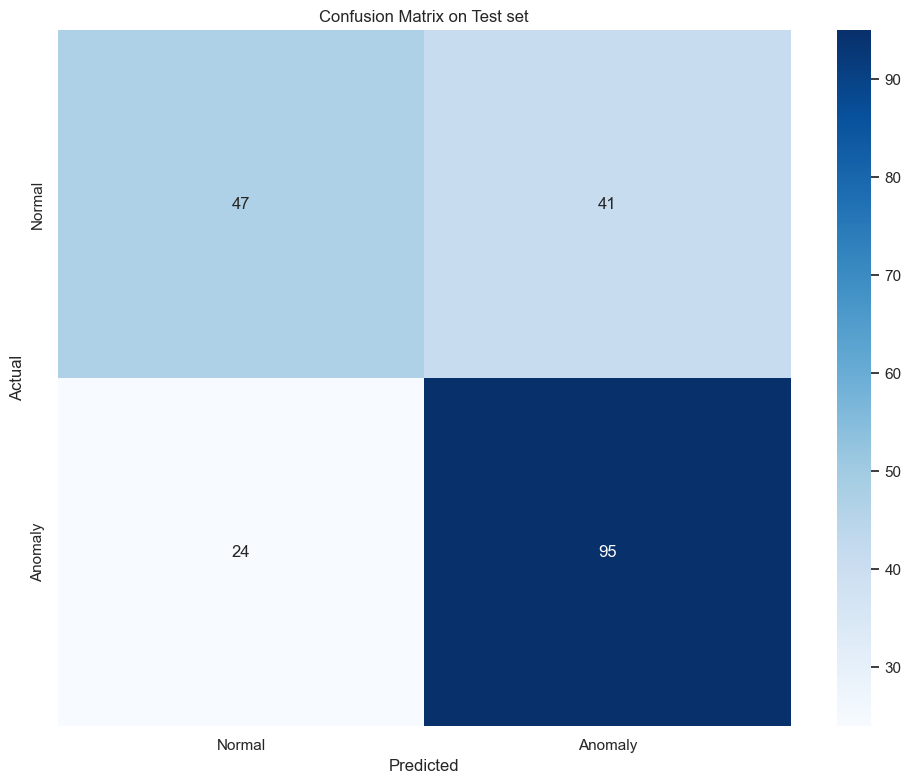

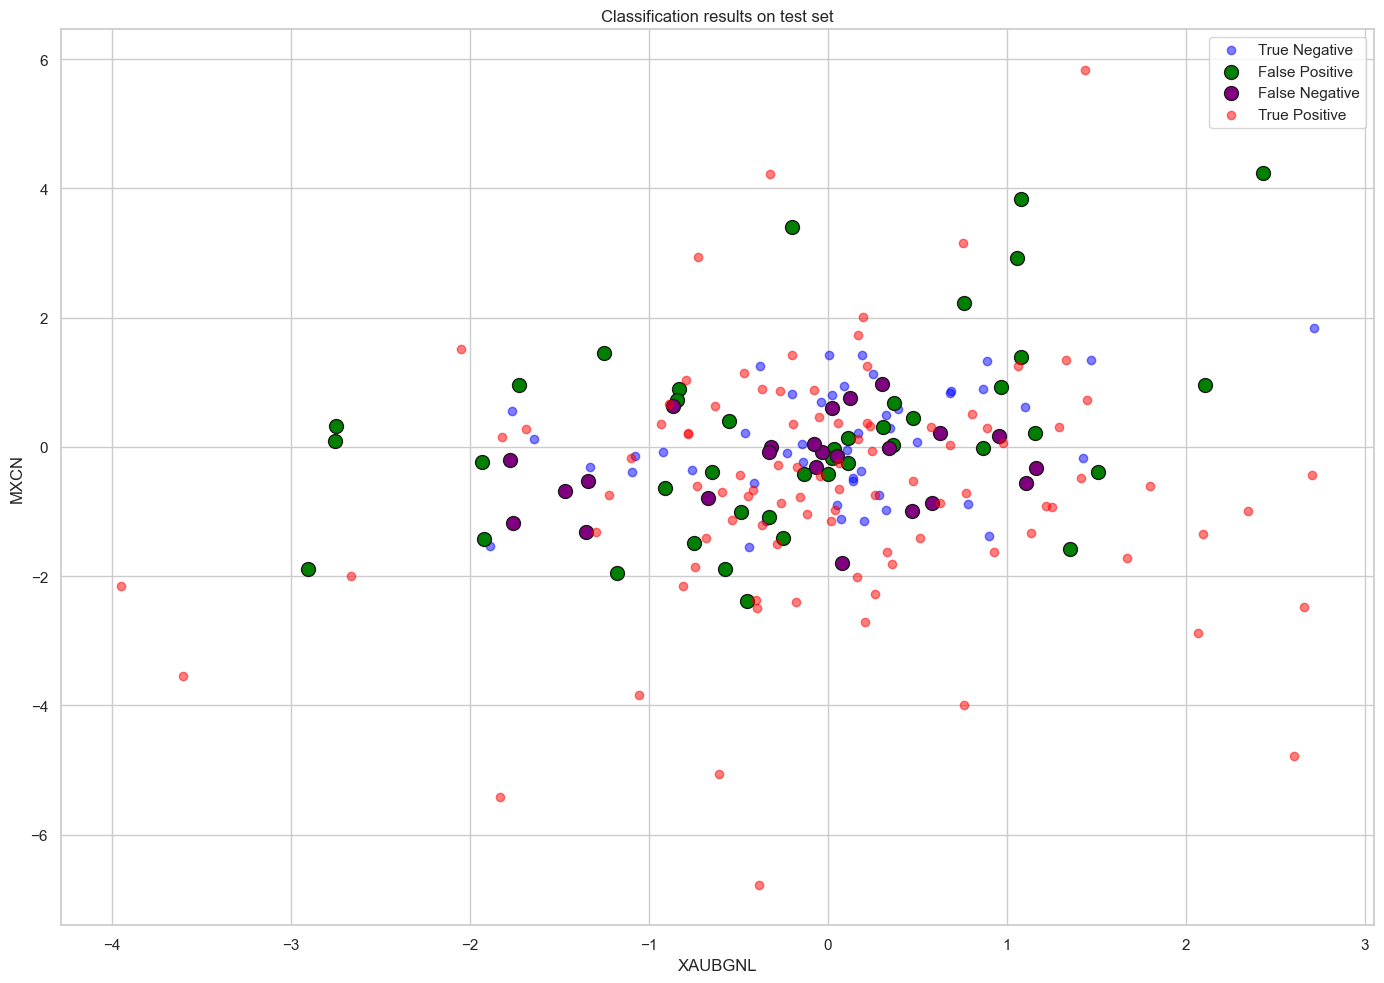

In [60]:
### Model evaluation on test set

# We apply the selected threshold to the test set (unseen data) and evaluate the results using precision, recall, F1 score, and confusion matrix (*HINT*: You can pick different metrics, e.g. AUC).

# We visualize the classification outcome using two selected features (that you can change...) to better understand false positives and false negatives in feature space.

from sklearn.metrics import confusion_matrix

# Step 4: Testing the model

# Compute the probability density function for the test set
p_test = multivariate_gaussian_pdf(X_test, mu, sigma)

# Make predictions using the best epsilon
predictions = (p_test < best_epsilon).astype(int)

# Calculate metrics
MVG_precision = precision_score(y_test, predictions, zero_division=0)
MVG_recall = recall_score(y_test, predictions, zero_division=0)
MVG_f1 = f1_score(y_test, predictions, zero_division=0)

print("\nTest set performance:")
print(f"Precision: {MVG_precision:.4f}")
print(f"Recall: {MVG_recall:.4f}")
print(f"F1 Score: {MVG_f1:.4f}")

# Create confusion matrix
cm = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = cm.ravel()

print("\nConfusion Matrix:")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Anomaly'],
            yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Test set')
plt.tight_layout()
plt.show()


# Visualize examples of correctly and incorrectly classified points
# Select two features for visualization
if X_test.shape[1] >= 2:
    # Choose two features (columns) for visualization
    feature1_idx = 22  # First feature
    feature2_idx = 15  # Second feature

    # Get feature names
    feature1_name = stationary_df.columns[feature1_idx]
    feature2_name = stationary_df.columns[feature2_idx]

    plt.figure(figsize=(14, 10))

    # True negatives (correctly classified normal points)
    plt.scatter(X_test[(y_test == 0) & (predictions == 0), feature1_idx],
                X_test[(y_test == 0) & (predictions == 0), feature2_idx],
                c='blue', marker='o', alpha=0.5, label='True Negative')

    # False positives (normal points classified as anomalies)
    plt.scatter(X_test[(y_test == 0) & (predictions == 1), feature1_idx],
                X_test[(y_test == 0) & (predictions == 1), feature2_idx],
                c='green', marker='o', s=100, edgecolors='k', label='False Positive')

    # False negatives (anomalies classified as normal)
    plt.scatter(X_test[(y_test == 1) & (predictions == 0), feature1_idx],
                X_test[(y_test == 1) & (predictions == 0), feature2_idx],
                c='purple', marker='o', s=100, edgecolors='k', label='False Negative')

    # True positives (correctly classified anomalies)
    plt.scatter(X_test[(y_test == 1) & (predictions == 1), feature1_idx],
                X_test[(y_test == 1) & (predictions == 1), feature2_idx],
                c='red', marker='o', alpha=0.5, label='True Positive')

    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.title('Classification results on test set')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

